In [1]:
import numpy as np

In [10]:
def loadDataSet(filename):
    '''
    读取数据集

    Args:
        filename: 文件名
    Returns:
        dataMat: 数据样本矩阵    
    '''
    dataMat = []
    with open(filename, 'rb') as f:
        for line in f:
            # 读取的字节流需要先解码成utf-8再处理
            eles = list(map(float, line.decode('utf-8').strip().split('\t')))
            dataMat.append(eles)
    return dataMat

In [3]:
def distEclud(vecA, vecB):
    '''
    计算两向量的欧氏距离

    Args:
        vecA: 向量A
        vecB: 向量B
    Returns:
        欧式距离
    '''
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

In [5]:
def randCent(dataSet, k):
    '''
    随机生成k个聚类中心

    Args:
        dataSet: 数据集
        k: 簇数目
    Returns:
        centroids: 聚类中心矩阵    
    '''
    m, _ = dataSet.shape
    # 随机从数据集中选几个作为初始聚类中心
    centroids = dataSet.take(np.random.choice(80,k), axis=0)
    return centroids

In [13]:
def kMeans(dataSet, k, maxIter = 5):
    '''
    K-Means

    Args:
        dataSet: 数据集
        k: 聚类数
    Returns:
        centroids: 聚类中心
        clusterAssment: 点分配结果
    '''
    # 随机初始化聚类中心
    centroids = randCent(dataSet, k)
    init_centroids = centroids.copy()
    
    m, n = dataSet.shape
    
    # 点分配结果：第一列指明样本所在的簇，第二列指明该样本到聚类中心的距离
    clusterAssment = np.mat(np.zeros((m,2)))
    
    # 标识聚类中心是否仍在变化
    clusterChanged = True
    
    # 直至聚类中心不再变化
    iterCount = 0
    while clusterChanged and iterCount < maxIter:
        iterCount += 1
        clusterChanged = False
        # 分配样本到簇
        for i in range(m):
            # 计算第i个样本到各个聚类中心的距离
            minIndex = 0
            minDist = np.inf
            for j in range(k):
                dist = distEclud(dataSet[i,:], centroids[j,:])
                if dist < minDist:
                    minIndex = j
                    minDist = dist
            # 任何一个样本的类簇分配发生变化则认为变化
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex, minDist**2
            
        # 刷新聚类中心：移动聚类中心点到所有簇的均值位置
        for cent in range(k):
            # 通过数组过滤得到簇中的点
            # matrix.A 是将matrix-->array
            ptsInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == cent)[0]]
            if ptsInCluster.shape[0] > 0:
                # 计算均值并移动
                centroids[cent, :] = np.mean(ptsInCluster, axis=0)
    return centroids, clusterAssment, init_centroids

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [27]:
dataMat = np.mat(loadDataSet('data/testSet.txt'))
m, n = np.shape(dataMat)

In [31]:
set_k = 4
centroids, clusterAssment, init_centroids = kMeans(dataMat, set_k)

clusterCount = np.shape(centroids)[0]
clusterCount

4

In [32]:
# 我们这里只设定了最多四个簇的样式，所以前面如果set_k设置超过了4，后面就会出现index error
patterns = ['o', 'D', '^', 's']
colors = ['b', 'g', 'y', 'black']

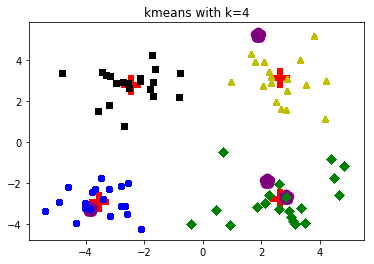

In [33]:
fig = plt.figure()
title = 'kmeans with k={}'.format(set_k)
ax = fig.add_subplot(111, title=title)
for k in range(clusterCount):
    # 绘制聚类中心
    ax.scatter(centroids[k,0], centroids[k,1], color='r', marker='+', linewidth=20)
    # 绘制初始聚类中心
    ax.scatter(init_centroids[k,0], init_centroids[k,1], color='purple', marker='*', linewidth=10 )
    for i in range(m):
        # 绘制属于该聚类中心的样本
        ptsInCluster = dataMat[np.nonzero(clusterAssment[:,0].A==k)[0]]
        ax.scatter(ptsInCluster[:,0].flatten().A[0], ptsInCluster[:,1].flatten().A[0], color=colors[k], marker=patterns[k])